<font size="8"> COVID-19 patient-level data of South Korea Analysis</font>

# Introduction

In this project a dataset from the Kaggle (https://www.kaggle.com/datasets/kimjihoo/coronavirusdataset) will be used.
This dataset is based on the information of COVID-19 report materials of KCDC (Korea Centers for Disease Control & Prevention) and local governments.

To get a better feel of data and find useful patterns, the queries and filtering data using Pandas, visualizing data with Matplotlib & Seaborn will be performed.

The scope of this project includes:
* Purpose of the exploratory data analysis
* Data loading using Pandas
* Data Cleaning and Preprocessing
* Exploratory data analysis
* Key Findings and Insights
* Conclusion
* Discussion

# Purpose of the Exploratory Data Analysis

Based on the provided data from South Korea and during the analysis of the obtained insights, to make recommendations on how to prepare for a possible pandemic for a country that has not yet faced it.

## Objectives of the EDA

The objectives of this exploratory data analysis are as follows:

* Identify the course of virus spread and the main records of virus exposure in the South Korean population;
* Identify differences in exposure to the virus according to a person's age or gender;
* Determine the impact of seasonality on the spread;
* Determine the behavior of people on the internet based on trend data of the keywords searched;  
* Summarize the findings and make recommendations based on them.

# Data loading using Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import linear_plot_of_changes, bar_plot_of_changes, linear_plot, plot_percentage_bars, plot_average_bars, find_corr_pairs


pd.options.mode.chained_assignment = None

In this project, the main focus will be on the impact of the virus on people, their morbidity rates and their behavior in the first months of the pandemic. Therefore, only a part of the available datasets was selected for further analysis.

In [2]:
patient_info = pd.read_csv('./PatientInfo.csv', sep=',')
time = pd.read_csv('./Time.csv', sep=',')
time_gender = pd.read_csv('./TimeGender.csv', sep=',')
time_age = pd.read_csv('./TimeAge.csv', sep=',')
weather = pd.read_csv('./Weather.csv', sep=',')
search_trend = pd.read_csv('./SearchTrend.csv', sep=',')

# Data Cleaning and Preprocessing

## Data review and conversion as needed

First of all, after checking the dtypes of features in each dataframe, features of values which are specified as __date__ are converted to a __datetime data type__. 
Then, according to the information is thought to be needed for further analysis, necessary features are selected.

The "__patient_info__" dataset contains epidemiological data of COVID-19 patients in South Korea, from which the data related to the patient's age, gender and
morbidity will be used for further analysis.

In [3]:
patient_info['symptom_onset_date'] = pd.to_datetime(patient_info['symptom_onset_date'], format='%Y-%m-%d', errors='coerce')
patient_info['confirmed_date'] = pd.to_datetime(patient_info['confirmed_date'], format='%Y-%m-%d', errors='coerce')
patient_info['released_date'] = pd.to_datetime(patient_info['released_date'], format='%Y-%m-%d', errors='coerce')
patient_info['deceased_date'] = pd.to_datetime(patient_info['deceased_date'], format='%Y-%m-%d', errors='coerce')

In [4]:
df_patient_info = patient_info[['sex', 'age', 'symptom_onset_date', 'confirmed_date', 'released_date', 'deceased_date', 'state']]

The "__time__"  dataset contains time series data of COVID-19 status in South Korea, from which data related to the testing and infection detection, patient morbidity and mortality will be used for furhter analysis.

In [5]:
time['date'] = pd.to_datetime(time['date'],  format='%Y-%m-%d', errors='coerce')

In [6]:
df_time = time[['date', 'test', 'negative', 'confirmed', 'deceased']]

The "__time_gender__" dataset contains time series data of COVID-19 status in terms of gender in South Korea, from which data related to the patient's gender, infection detection, patient mortality will be used for further analysis.

In [7]:
time_gender['date'] = pd.to_datetime(time_gender['date'],  format='%Y-%m-%d', errors='coerce')

In [8]:
df_time_gender = time_gender[['date', 'sex', 'confirmed', 'deceased']]

The "__time_age__" dataset contains time series data of COVID-19 status in terms of the age in South Korea, from which data related to the patient's age, infection detection, patient mortality will be used for further analysis.

In [9]:
time_age['date'] = pd.to_datetime(time_age['date'],  format='%Y-%m-%d', errors='coerce')

In [10]:
df_time_age = time_age[['date', 'age', 'confirmed', 'deceased']]

The "__weather__" dataset contains data of the weather in the regions of South Korea, from which data related to the average temperature and average relative humidity will be used for further analysis.

In [11]:
weather['date'] = pd.to_datetime(weather['date'],  format='%Y-%m-%d', errors='coerce')

In [12]:
df_weather = weather[['date', 'avg_temp', 'avg_relative_humidity']]

The "__search_trend__" dataset contains data trend data of the keywords searched in NAVER which is one of the largest portals in South Korea. All data will be used for futher analysis.

In [13]:
search_trend['date'] = pd.to_datetime(search_trend['date'],  format='%Y-%m-%d', errors='coerce')

In [14]:
df_search_trend = search_trend

## Data transformation

### DataFrames related to testing, morbidity, mortality, patient gender and age groups

Since the main common feature in "_df_time_", "_df_time_gender_" and "_df_time_age_" DataFrames is date, for easier further DataFrame concatenation, date is assign as index.

In [15]:
df_time = df_time.set_index('date')
df_time.index.name = 'date'

In [16]:
df_time_gender = time_gender.set_index('date')
df_time_gender.index.name = 'date'

In [17]:
df_time_age = df_time_age.set_index('date')
df_time_age.index.name = 'date'

To maintain the same DataFrame format ("_df_time_" DataFrame is selected as a basis), "_df_time_gender_" and "_df_time_age_" datasets are transformed by using the pivot function to convert the "sex" and "age" columns values into features.

In [18]:
# The unique values in the 'sex' column will be used as the new column headers in the pivoted DataFrame.
df_time_gender = df_time_gender.pivot(columns='sex', values=['confirmed', 'deceased'])
df_time_gender.columns = ['_'.join(col) for col in df_time_gender.columns]

In [19]:
# The unique values in the 'age' column will be used as the new column headers in the pivoted DataFrame.
df_time_age = df_time_age.pivot(columns='age', values=['confirmed', 'deceased'])
df_time_age.columns = ['_'.join(col) for col in df_time_age.columns]

In [20]:
print(f'The "df_time" dataset contains {df_time.shape[1]} columns (features) and {df_time.shape[0]} rows (samples).')
print(f'After transformation, the "df_time_gender" dataset contains {df_time_gender.shape[1]} columns (features) and {df_time_gender.shape[0]} rows (samples).')
print(f'After transformation, the "df_time_age" dataset contains {df_time_age.shape[1]} columns (features) and {df_time_age.shape[0]} rows (samples).') 

The "df_time" dataset contains 4 columns (features) and 163 rows (samples).
After transformation, the "df_time_gender" dataset contains 4 columns (features) and 121 rows (samples).
After transformation, the "df_time_age" dataset contains 18 columns (features) and 121 rows (samples).


Since the shape of these DataFrames does not match, and for further work it would be more convenient to use a common DataFrame, using the concatination function they will be combined, automatically filling features without information with NaN values.

In [21]:
df_merged_time = pd.concat([df_time_gender, df_time_age, df_time], axis=1)

In [22]:
print(f'The "df_merged_time" dataset contains {df_merged_time.shape[1]} columns (features) and {df_merged_time.shape[0]} rows (samples).')

The "df_merged_time" dataset contains 26 columns (features) and 163 rows (samples).


### DataFrames related to weather and search trends on the internet

For further analysis, it is planned to use in general the average temperature and average relative humidity data of the entire country, as well as human behavior in search systems. The __"weather"__ DataFrame is transformed accordingly, and concatinated by the same principle as the DataFrames before.

In [23]:
# The data will be grouped by date and the daily average temperature and humidity will be calclulated.
df_daily_weather = df_weather.groupby('date')[['avg_temp', 'avg_relative_humidity']].mean()

In [24]:
print(f'After transformation, the "df_daily_weather" dataset contains {df_daily_weather.shape[1]} columns (features) and {df_daily_weather.shape[0]} rows (samples).')
print(f'The "df_search_trend" dataset contains {df_search_trend.shape[1]} columns (features) and {df_search_trend.shape[0]} rows (samples).')

After transformation, the "df_daily_weather" dataset contains 2 columns (features) and 1642 rows (samples).
The "df_search_trend" dataset contains 5 columns (features) and 1642 rows (samples).


Since the date columns overlap between the DataFrames, the merge function will be used to join the additional columns from the "__df_search_trend__" DataFrame.

In [25]:
df_merged_weather = pd.merge(df_daily_weather, df_search_trend, on='date')

For further analysis date is assigned as index.

In [26]:
df_merged_weather = df_merged_weather.set_index('date')
df_merged_weather.index.name = 'date'

In [27]:
print(f'The "df_merged_weather" dataset contains {df_merged_weather.shape[1]} columns (features) and {df_merged_weather.shape[0]} rows (samples).')

The "df_merged_weather" dataset contains 6 columns (features) and 1642 rows (samples).


### DataFrame related to specific patient data

At this stage, no additional transformation steps are performed on the "__df_patient_info__" DataFrame.

In [28]:
print(f'The "df_patient_info" dataset contains {df_patient_info.shape[1]} columns (features) and {df_patient_info.shape[0]} rows (samples).')

The "df_patient_info" dataset contains 7 columns (features) and 5165 rows (samples).


## Handling missing values and removing duplicates


At this step, the missing intercepted data and its necessity for the analysis will be evaluated. Since the large part of data will be analyzed by date as a time series, duplicates will be searched only in this column.

### DataFrames related to testing, morbidity, mortality, patient gender and age groups

In [29]:
df_merged_time_missing_values_count = df_merged_time.isnull().sum()
print(f'The number of missing data points per column:\n\n{df_merged_time_missing_values_count}')

The number of missing data points per column:

confirmed_female    42
confirmed_male      42
deceased_female     42
deceased_male       42
confirmed_0s        42
confirmed_10s       42
confirmed_20s       42
confirmed_30s       42
confirmed_40s       42
confirmed_50s       42
confirmed_60s       42
confirmed_70s       42
confirmed_80s       42
deceased_0s         42
deceased_10s        42
deceased_20s        42
deceased_30s        42
deceased_40s        42
deceased_50s        42
deceased_60s        42
deceased_70s        42
deceased_80s        42
test                 0
negative             0
confirmed            0
deceased             0
dtype: int64


It can be seen that the first month lacks data about the patients themselves, but this has no effect on information about the general spread of the virus. For this reason, at this step, the missing values are left as it is.

In [30]:
print(f'The "df_merged_time" data set contains {len(df_merged_time.index)} date rows from which {df_merged_time.index.nunique()} are unique.')

The "df_merged_time" data set contains 163 date rows from which 163 are unique.


### DataFrames related to weather and search trends on the internet

In [31]:
df_merged_weather_missing_values_count = df_merged_weather.isnull().sum()
print(f'The number of missing data points per column:\n\n{df_merged_weather_missing_values_count}')

The number of missing data points per column:

avg_temp                 0
avg_relative_humidity    0
cold                     0
flu                      0
pneumonia                0
coronavirus              0
dtype: int64


In [32]:
print(f'The "df_merged_weather" data set contains {len(df_merged_weather.index)} date rows from which {df_merged_weather.index.nunique()} are unique.')

The "df_merged_weather" data set contains 1642 date rows from which 1642 are unique.


### DataFrame related to specific patient data

In [33]:
df_patient_info_missing_values_count = df_patient_info.isnull().sum()
print(f'The number of missing data points per column:\n\n{df_patient_info_missing_values_count}')

The number of missing data points per column:

sex                   1122
age                   1380
symptom_onset_date    4476
confirmed_date           3
released_date         3578
deceased_date         5099
state                    0
dtype: int64


It can be seen that in the essential features, according to which the analysis is planned, has some missing values. Due to this reason related samples will be removed.

In [34]:
df_patient_info_filtered = df_patient_info.dropna(subset=['sex', 'age', 'confirmed_date'])
df_patient_info_missing_values_count = df_patient_info_filtered.isnull().sum()
print(f'The number of missing data points per column after cleaning:\n\n{df_patient_info_missing_values_count}')

The number of missing data points per column after cleaning:

sex                      0
age                      0
symptom_onset_date    3228
confirmed_date           0
released_date         2203
deceased_date         3713
state                    0
dtype: int64


The logic of the absence of the remaining features values will be evaluated in the following stages of the analysis together with the analysis of the known data.

In [35]:
print(f'The "df_patient_info_filtered" data set contains {len(df_patient_info_filtered.index)} date rows from which {df_patient_info_filtered.index.nunique()} are unique.')

The "df_patient_info_filtered" data set contains 3779 date rows from which 3779 are unique.


## Treating the outliers

### DataFrames related to testing, morbidity, mortality, patient gender and age groups

Based on the following visible information about the DataFrame, it can be seen that part of the values are part of another value, therefore, in order to check the validation of the data, additional rows will be created and according to them, invalid rows will be removed.

In [36]:
df_merged_time.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 163 entries, 2020-01-20 to 2020-06-30
Freq: D
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   confirmed_female  121 non-null    float64
 1   confirmed_male    121 non-null    float64
 2   deceased_female   121 non-null    float64
 3   deceased_male     121 non-null    float64
 4   confirmed_0s      121 non-null    float64
 5   confirmed_10s     121 non-null    float64
 6   confirmed_20s     121 non-null    float64
 7   confirmed_30s     121 non-null    float64
 8   confirmed_40s     121 non-null    float64
 9   confirmed_50s     121 non-null    float64
 10  confirmed_60s     121 non-null    float64
 11  confirmed_70s     121 non-null    float64
 12  confirmed_80s     121 non-null    float64
 13  deceased_0s       121 non-null    float64
 14  deceased_10s      121 non-null    float64
 15  deceased_20s      121 non-null    float64
 16  deceased_30s     

New feature 'check_for_confirmed_by_age' will be created to indicate whether the sum of age-specific confirmed cases matches the total _confirmed_ cases for each row.

In [37]:
df_merged_time['check_for_confirmed_by_age'] = df_merged_time[
    [
        'confirmed_0s',
        'confirmed_10s',
        'confirmed_20s',
        'confirmed_30s',
        'confirmed_40s',
        'confirmed_50s',
        'confirmed_60s',
        'confirmed_70s',
        'confirmed_80s'
    ]
].sum(axis=1) == df_merged_time['confirmed']

New feature 'check_for_confirmed_by_age' will be created to indicate whether the sum of gender-specific confirmed cases matches the total _confirmed_ cases for each row.

In [38]:
df_merged_time['check_for_confirmed_by_sex'] = df_merged_time[
    [
        'confirmed_female',
        'confirmed_male',
    ]
].sum(axis=1) == df_merged_time['confirmed']

New feature 'check_for_deceased_by_age' will be created to indicate whether the sum of age-specific deceased cases matches the total _deceased_ cases for each row.

In [39]:
df_merged_time['check_for_deceased_by_age'] = df_merged_time[
    [
        'deceased_0s',
        'deceased_10s',
        'deceased_20s',
        'deceased_30s',
        'deceased_40s',
        'deceased_50s',
        'deceased_60s',
        'deceased_70s',
        'deceased_80s'
    ]
].sum(axis=1) == df_merged_time['deceased']

New feature 'check_for_deceased_by_age' will be created to indicate whether the sum of gender-specific deceased cases matches the total _deceased_ cases for each row.

In [40]:
df_merged_time['check_for_deceased_by_sex'] = df_merged_time[
    [
        'deceased_female',
        'deceased_male',
    ]
].sum(axis=1) == df_merged_time['deceased']

For data analysis, when evaluating people's age and gender, a new DataFrame "__df_filtered_time__" will be used, in which non-matching values will be removed.

In [41]:
df_filtered_time_indices = df_merged_time[
    (df_merged_time['check_for_confirmed_by_sex'] == False) |
    (df_merged_time['check_for_confirmed_by_age'] == False) |
    (df_merged_time['check_for_deceased_by_sex'] == False) |
    (df_merged_time['check_for_deceased_by_age'] == False)
]

In [42]:
print(f"The data of the following days will not be used for data analysis and visualization, "
      f"where people's age and gender will be assessed :\n\n {df_filtered_time_indices.index}.")

The data of the following days will not be used for data analysis and visualization, where people's age and gender will be assessed :

 DatetimeIndex(['2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23',
               '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04',
               '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08',
               '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12',
               '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16',
               '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20',
               '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24',
               '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-02-29', '2020-03-01', '2020-03-07', '2020-03-08',
               '2020-03-15', '2020-04-26'],
              dtype='datetime64[ns]', n

In [43]:
df_filtered_time = df_merged_time.drop(df_filtered_time_indices.index)

Since self-check columns will not be needed for further analysis - they are removed as well.

In [44]:
df_filtered_time = df_filtered_time.drop(
    columns=[
        'check_for_confirmed_by_sex',
        'check_for_confirmed_by_age',
        'check_for_deceased_by_sex',
        'check_for_deceased_by_age'
    ],
    axis=1
)

__Note:__ in the following analyses, it will be assessed that the data from the "__df_time__" DataFrame is more accurate, and the aforementioned inconsistencies arose due to possible incorrect filling of more detailed information about the patients.

### DataFrames related to weather and search trends on the internet

In [45]:
df_merged_weather.describe()

,avg_temp,avg_relative_humidity,cold,flu,pneumonia,coronavirus
count,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000
mean,13.860025,65.700646,0.190506,0.244946,0.221430,1.862522
std,9.330142,13.804898,0.459556,0.762229,0.463014,9.042341
min,-10.168750,30.450000,0.051630,0.009810,0.068810,0.001540
25%,5.810938,54.775000,0.106630,0.042105,0.128630,0.006270
50%,14.346875,66.656250,0.133170,0.097855,0.164445,0.008900
75%,21.982813,76.242188,0.165900,0.250035,0.209765,0.013158
max,30.731250,94.406250,15.720710,27.327270,11.393200,100.000000


From the descriptive statistics of a "__df_merged_weather__" DataFrame, it can be seen that all values are within logical limits, so at this step, no values will be treated as outliers.

### DataFrame related to specific patient data

In [46]:
df_patient_info_filtered.describe(include='all')

,sex,age,symptom_onset_date,confirmed_date,released_date,deceased_date,state
count,3779,3779,551,3779,1576,66,3779
unique,2,11,NaN,NaN,NaN,NaN,3
top,female,20s,NaN,NaN,NaN,NaN,released
freq,2065,897,NaN,NaN,NaN,NaN,2494
mean,NaN,NaN,2020-03-21 05:47:35.172413952,2020-03-22 03:22:43.217782272,2020-04-03 15:15:31.979695616,2020-03-17 01:05:27.272727296,NaN
min,NaN,NaN,2020-01-19 00:00:00,2020-01-20 00:00:00,2020-02-05 00:00:00,2020-02-19 00:00:00,NaN
25%,NaN,NaN,2020-02-27 00:00:00,2020-03-01 00:00:00,2020-03-20 00:00:00,2020-03-02 00:00:00,NaN
50%,NaN,NaN,2020-03-12 00:00:00,2020-03-11 00:00:00,2020-03-28 00:00:00,2020-03-09 00:00:00,NaN
75%,NaN,NaN,2020-03-28 00:00:00,2020-03-31 00:00:00,2020-04-13 00:00:00,2020-03-30 12:00:00,NaN
max,NaN,NaN,2020-06-27 00:00:00,2020-06-30 00:00:00,2020-06-28 00:00:00,2020-05-25 00:00:00,NaN


From the descriptive statistics of a "__df_patient_info_filtered__" DataFrame, it can be seen that all values are within logical limits, so at this step, no values will be treated as outliers.

# Exploratory Data Analysis

## The course of virus spread and the main records of virus exposure in the South Korean population


Both statistical and visual methods will be used to identify and understand the characteristics of the course of virus spread.

In [47]:
first_confirmed = df_merged_time[df_merged_time["confirmed"] == 1].index.min()
print(f"The first infection case in South Korea was recorded on {first_confirmed.strftime('%Y-%m-%d')}.")

The first infection case in South Korea was recorded on 2020-01-20.


In [48]:
second_confirmed = df_merged_time[df_merged_time["confirmed"] == 2].index.min()
print(f'The second case of infection in South Korea was recorded after {(second_confirmed - first_confirmed).days} days after the first one recorded.')

The second case of infection in South Korea was recorded after 4 days after the first one recorded.


In [49]:
first_record = df_merged_time['confirmed'].index.min().strftime('%Y-%m-%d')
last_record = df_merged_time['confirmed'].index.max().strftime('%Y-%m-%d')
print(f"The data of testing, confirmed and deceased cases are collected during the period from {first_record} till {last_record}.")

The data of testing, confirmed and deceased cases are collected during the period from 2020-01-20 till 2020-06-30.


In [90]:
total_tests = df_merged_time['test'].max()
total_confirmed = df_merged_time['confirmed'].max()
total_deceased = df_merged_time['deceased'].max()
print(
    f"During the entire period that data was collected:"
    f"\n\ntotal number of tests performed - {format(total_tests, ',')} "
    f"of which {format(total_confirmed, ',')} were found to be positive "
    f"for Covid-19 virus;\n\ntotal number of deaths recorded - {format(total_deceased, ',')}."
)

During the entire period that data was collected:

total number of tests performed - 1,273,766 of which 12,800 were found to be positive for Covid-19 virus;

total number of deaths recorded - 282.


In [51]:
# Since datasets consists cumulative numbers, additional new feature columns 'new tests', 'new cases' and 'new decease' are calculated.
df_merged_time['new_tests'] = df_merged_time['test'].diff()
df_merged_time['new_cases'] = df_merged_time['confirmed'].diff()
df_merged_time['new_deaths'] = df_merged_time['deceased'].diff()

In [52]:
max_new_tests = df_merged_time['new_tests'].max()
max_new_tests_date = df_merged_time[df_merged_time['new_tests'] == max_new_tests].index.min().strftime('%Y-%m-%d')
print(f"The highest recorded number of tests performed per day is {format(int(max_new_tests), ',')} (recorded on {max_new_tests_date}).")

The highest recorded number of tests performed per day is 18,460 (recorded on 2020-06-02).


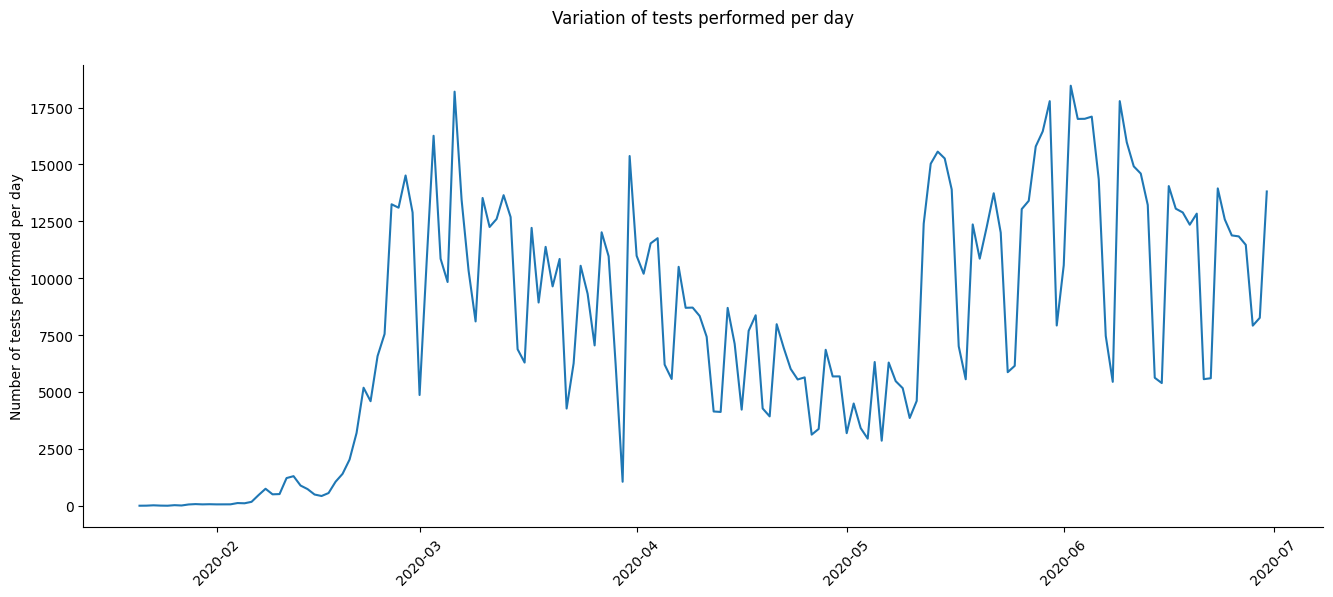

In [53]:
linear_plot_of_changes(
    data_frame=df_merged_time,
    selected_columns=['test'],
    start_date=first_record,
    end_date=last_record,
    y_label='Number of tests performed per day',
    title='Variation of tests performed per day',
    show_legend=False
)

In [54]:
max_new_cases = df_merged_time['new_cases'].max()
max_new_cases_date = df_merged_time[df_merged_time['new_cases'] == max_new_cases].index.min().strftime('%Y-%m-%d')
print(f"The highest recorded number of new cases per day is {int(max_new_cases)} (recorded on {max_new_cases_date}).")

The highest recorded number of new cases per day is 813 (recorded on 2020-02-29).


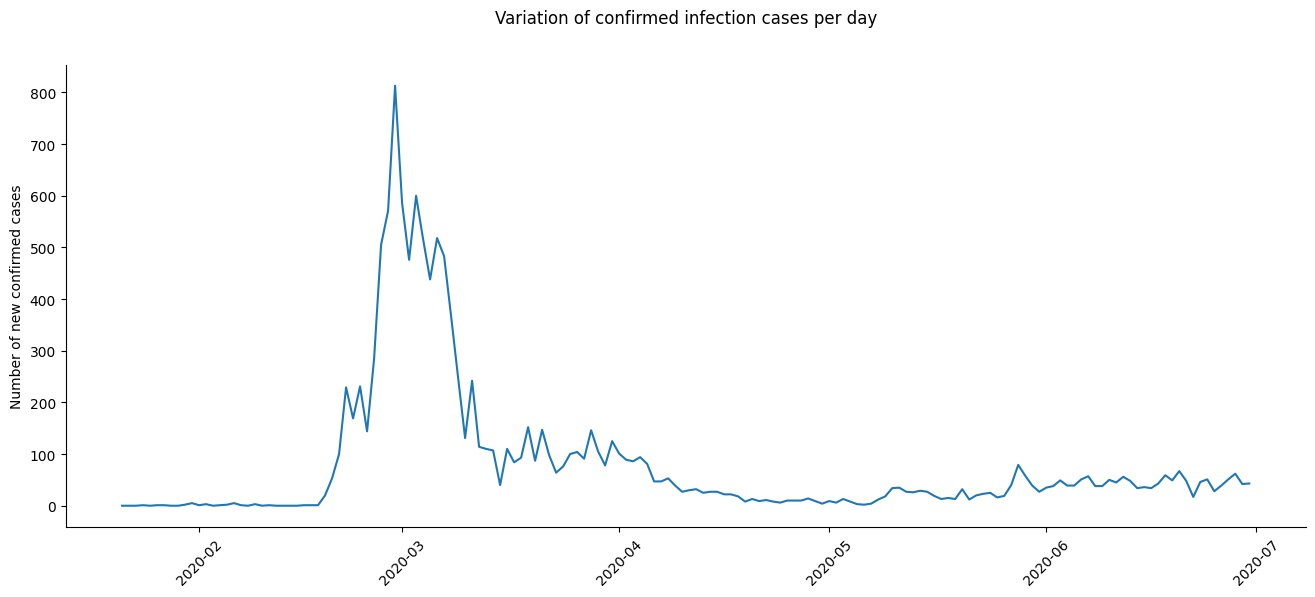

In [55]:
linear_plot_of_changes(
    data_frame=df_merged_time,
    selected_columns=['confirmed'],
    start_date=first_record,
    end_date=last_record,
    y_label='Number of new confirmed cases',
    title='Variation of confirmed infection cases per day',
    show_legend=False
)

In [56]:
max_new_deaths = df_merged_time['new_deaths'].max()
max_new_deaths_date = df_merged_time[df_merged_time['new_deaths'] == max_new_deaths].index.min().strftime('%Y-%m-%d')
print(f"The highest recorded number of deceases per day is {int(max_new_deaths)} (recorded on {max_new_deaths_date}).")

The highest recorded number of deceases per day is 9 (recorded on 2020-03-24).


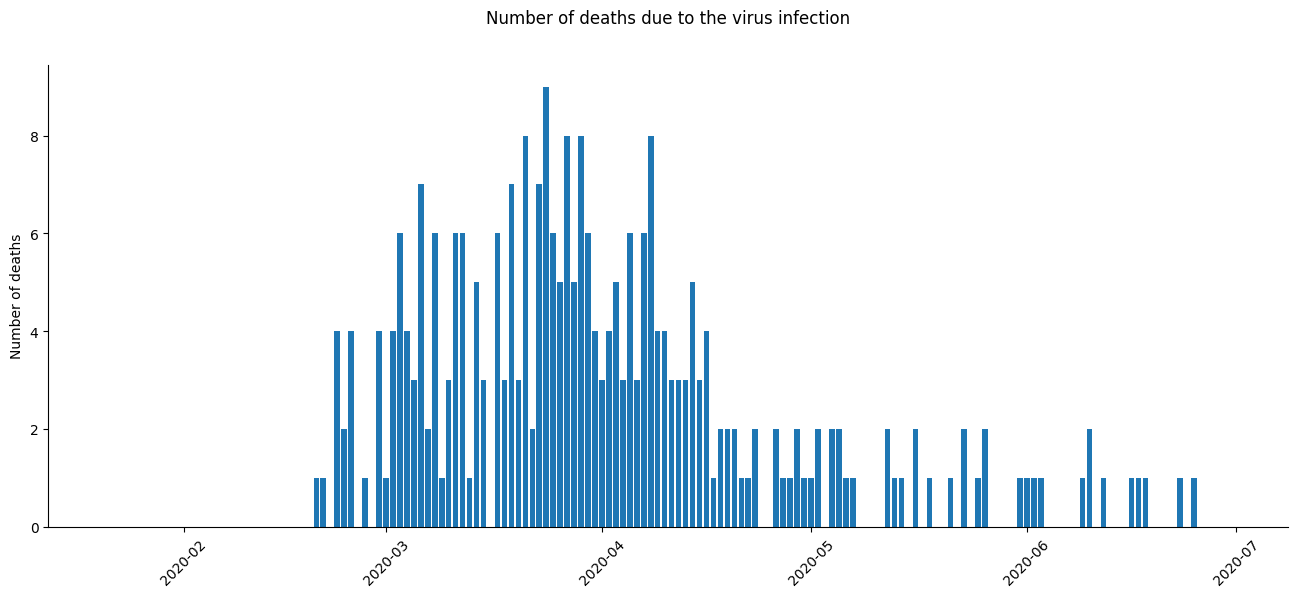

In [57]:
bar_plot_of_changes(
    data_frame=df_merged_time,
    selected_columns=['deceased'],
    start_date=first_record,
    end_date=last_record,
    y_label='Number of deaths',
    title='Number of deaths due to the virus infection',
    show_legend=False
)

In [58]:
df_merged_time['test_positivity_ratio'] = df_merged_time['confirmed'] / df_merged_time['test']
avg_test_positivity_ratio = df_merged_time['test_positivity_ratio'].mean()
min_test_positivity_ratio = df_merged_time['test_positivity_ratio'].min()
min_test_positivity_ratio_date = df_merged_time[df_merged_time['test_positivity_ratio'] == min_test_positivity_ratio].index.min().strftime('%Y-%m-%d')
max_test_positivity_ratio = df_merged_time['test_positivity_ratio'].max()
max_test_positivity_ratio_date = df_merged_time[df_merged_time['test_positivity_ratio'] == max_test_positivity_ratio].index.min().strftime('%Y-%m-%d')
print(f"The average ratio between the performed tests and the test with a positive result is {round(avg_test_positivity_ratio, 4)}.")
print(
    f"The smallest ratio recorded between the performed tests "
    f"and the test with a positive result is {round(min_test_positivity_ratio, 4)} "
    f"(recorded on {min_test_positivity_ratio_date})."
)
print(
    f"The highest ratio recorded between the performed tests "
    f"and the test with a positive result is {round(max_test_positivity_ratio, 4)} "
    f"(recorded on {max_test_positivity_ratio_date})."
)

The average ratio between the performed tests and the test with a positive result is 0.0339.
The smallest ratio recorded between the performed tests and the test with a positive result is 0.0032 (recorded on 2020-02-18).
The highest ratio recorded between the performed tests and the test with a positive result is 1.0 (recorded on 2020-01-20).


Since the highest ratio was in the first days, when there were no mass tests performed yet, in order to visualy see  the changes, the start date for the graph was chosen when there was increase in testing.

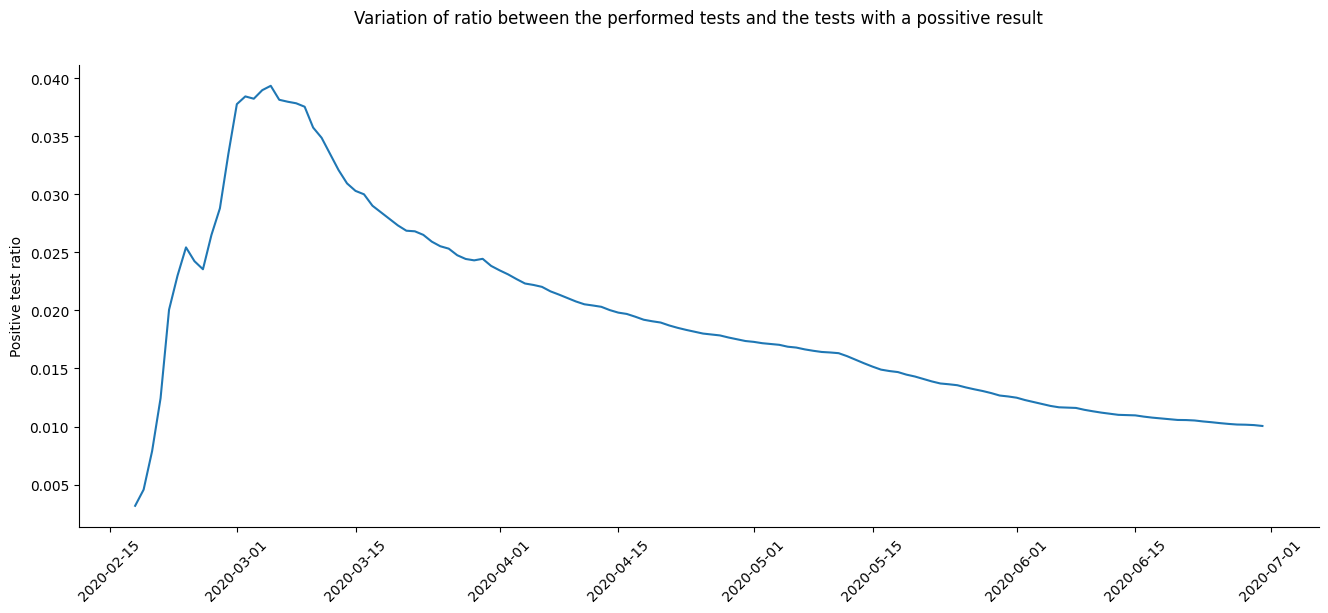

In [59]:
linear_plot(
    data_frame=df_merged_time,
    selected_columns=['test_positivity_ratio'],
    start_date=min_test_positivity_ratio_date,
    end_date=last_record,
    y_label='Positive test ratio',
    title='Variation of ratio between the performed tests and the tests with a possitive result',
    show_legend=False
)

In [60]:
mortality_ratio = total_deceased / total_confirmed
print(f'The overall mortality ratio of infected with the virus is {round(mortality_ratio, 4)}.')

The overall mortality ratio of infected with the virus is 0.022.


In [61]:
# The DataFrame is supplemented with new columns, where information about the characteristics of the virus is calculated.
df_patient_info_filtered.loc[:, 'symptom_to_confirmed'] = (df_patient_info_filtered['confirmed_date'] - df_patient_info_filtered['symptom_onset_date']).dt.days
df_patient_info_filtered.loc[:, 'confirmed_to_released'] = (df_patient_info_filtered['released_date'] - df_patient_info_filtered['confirmed_date']).dt.days
df_patient_info_filtered.loc[:, 'confirmed_to_deceased'] = (df_patient_info_filtered['deceased_date'] - df_patient_info_filtered['confirmed_date']).dt.days

In [62]:
avg_symptom_to_confirmed = df_patient_info_filtered['symptom_to_confirmed'].mean()
avg_confirmed_to_released = df_patient_info_filtered['confirmed_to_released'].mean()
avg_confirmed_to_deceased = df_patient_info_filtered['confirmed_to_deceased'].mean()
print(f'The average time from the onset of symptoms to the confirmation of the virus is {round(avg_symptom_to_confirmed, 2)} days.')
print(f'The average time from confirmation of virus infection to recovery and release (if recovers) is {round(avg_confirmed_to_released, 2)} days.')
print(f'The average time from confirmation of virus infection to decease is {round(avg_confirmed_to_deceased, 2)} days.')

The average time from the onset of symptoms to the confirmation of the virus is 4.77 days.
The average time from confirmation of virus infection to recovery and release (if recovers) is 24.81 days.
The average time from confirmation of virus infection to decease is 10.86 days.


## Differences in exposure to the virus according to a person's age or gender


For a better understanding the effect of the virus and the distribution based on a person age and gender, data visualization will be used.

### Distribution of virus infection based on person gender

The following visualizations use cumulative patient numbers to evaluate the effect of the virus on certain patient groups.

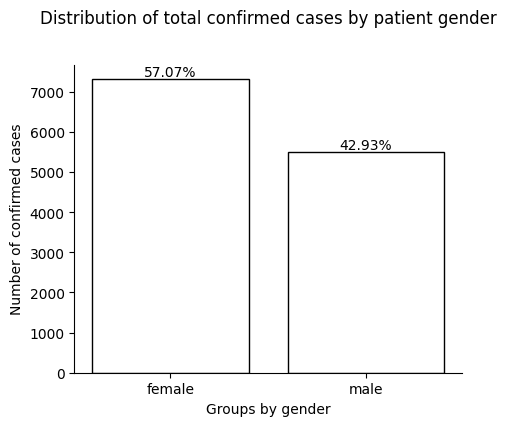

In [63]:
plot_percentage_bars(
    data_frame=df_filtered_time,
    columns=[
        'confirmed_female',
        'confirmed_male'
    ],
    x_label='Groups by gender',
    y_label='Number of confirmed cases',
    title='Distribution of total confirmed cases by patient gender'
)

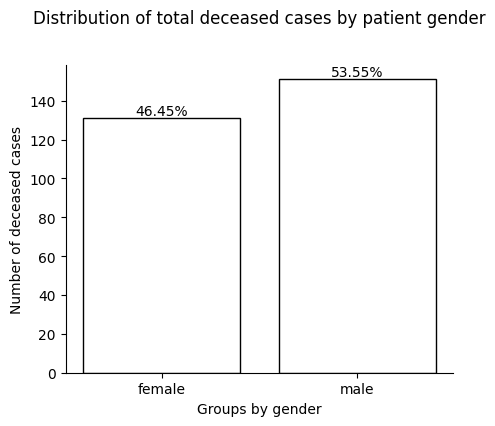

In [64]:
plot_percentage_bars(
    data_frame=df_filtered_time,
    columns=[
        'deceased_female',
        'deceased_male'
    ],
    x_label='Groups by gender',
    y_label='Number of deceased cases',
    title='Distribution of total deceased cases by patient gender'
)

When assessing how quickly the virus affects the human body, data which contains detailed information about the cases and patients is used.

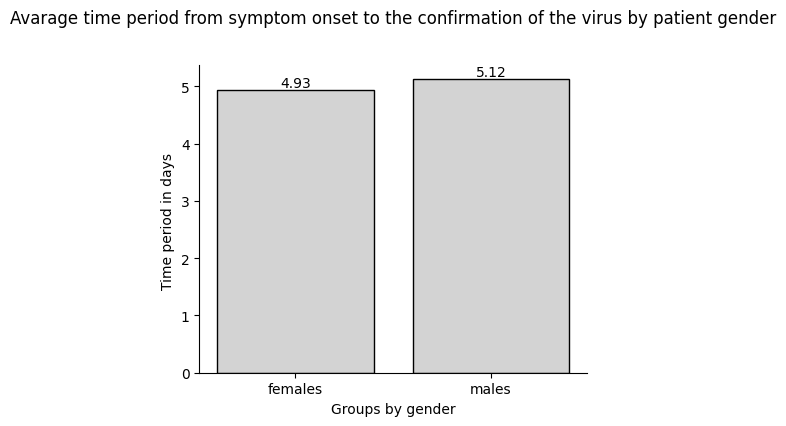

In [65]:
plot_average_bars(
    data_frame=df_patient_info_filtered,
    group_by='sex',
    avg_parameter='symptom_to_confirmed',
    x_label='Groups by gender',
    y_label='Time period in days ',
    title='Avarage time period from symptom onset to the confirmation of the virus by patient gender'
)

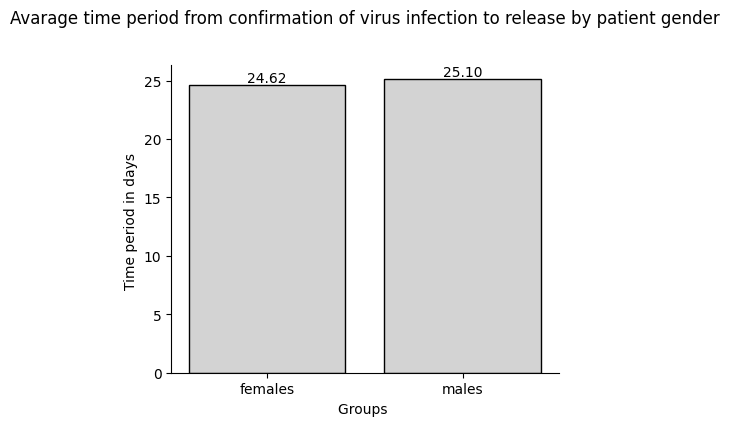

In [66]:
plot_average_bars(
    data_frame=df_patient_info_filtered,
    group_by='sex',
    avg_parameter='confirmed_to_released',
    x_label='Groups ',
    y_label='Time period in days ',
    title='Avarage time period from confirmation of virus infection to release by patient gender'
)

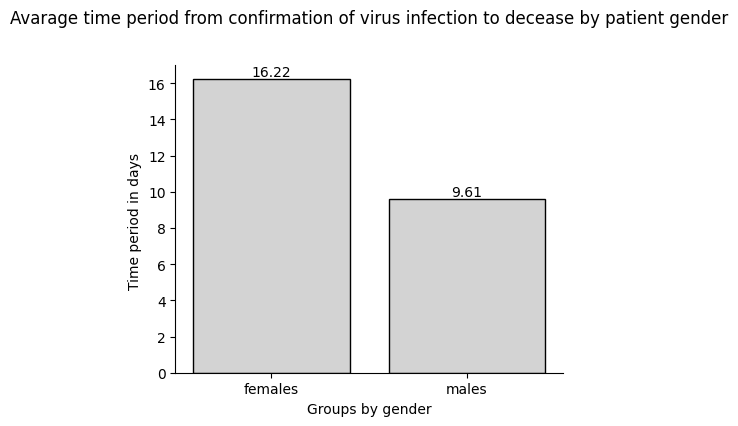

In [67]:
plot_average_bars(
    data_frame=df_patient_info_filtered,
    group_by='sex',
    avg_parameter='confirmed_to_deceased',
    x_label='Groups by gender',
    y_label='Time period in days ',
    title='Avarage time period from confirmation of virus infection to decease by patient gender')

In [68]:
# Date of the first and last record in the "df_filtered_time" DataFrame:
first_record_filtered = df_filtered_time['confirmed'].index.min().strftime('%Y-%m-%d')
last_record_filtered = df_filtered_time['confirmed'].index.max().strftime('%Y-%m-%d')

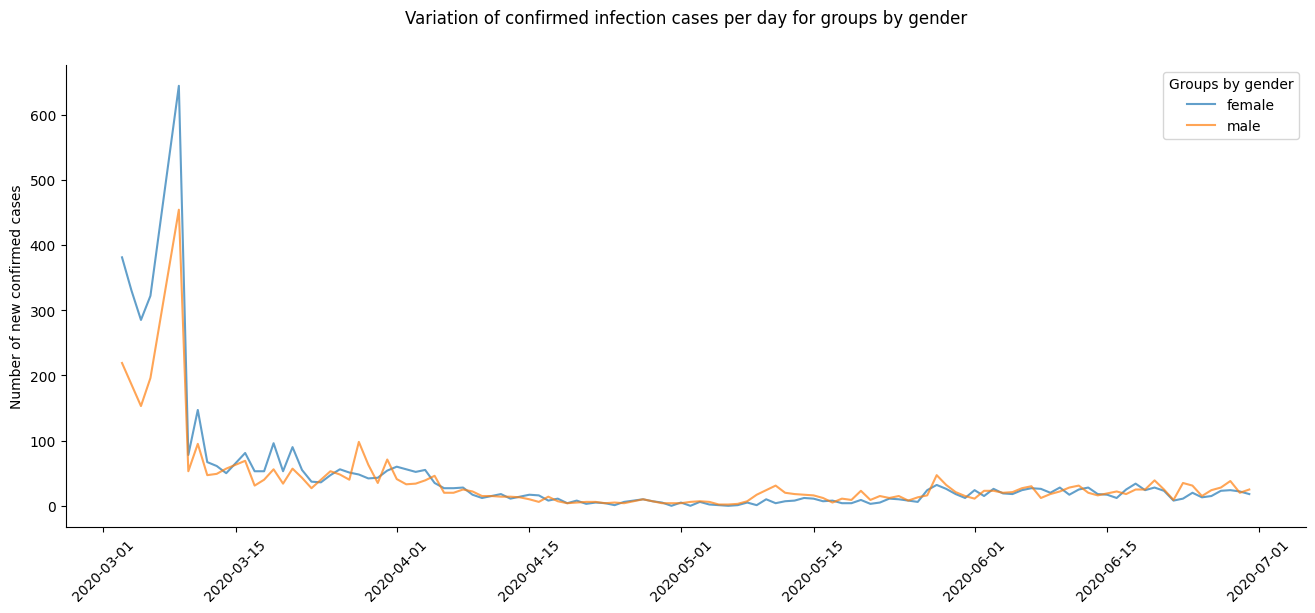

In [69]:
linear_plot_of_changes(
    data_frame=df_filtered_time,
    selected_columns=[
        'confirmed_female',
        'confirmed_male'
    ],
    start_date=first_record_filtered,
    end_date=last_record_filtered,
    y_label='Number of new confirmed cases',
    title='Variation of confirmed infection cases per day for groups by gender',
    legend_title='Groups by gender',
    show_legend=True,
    alpha=0.7
)

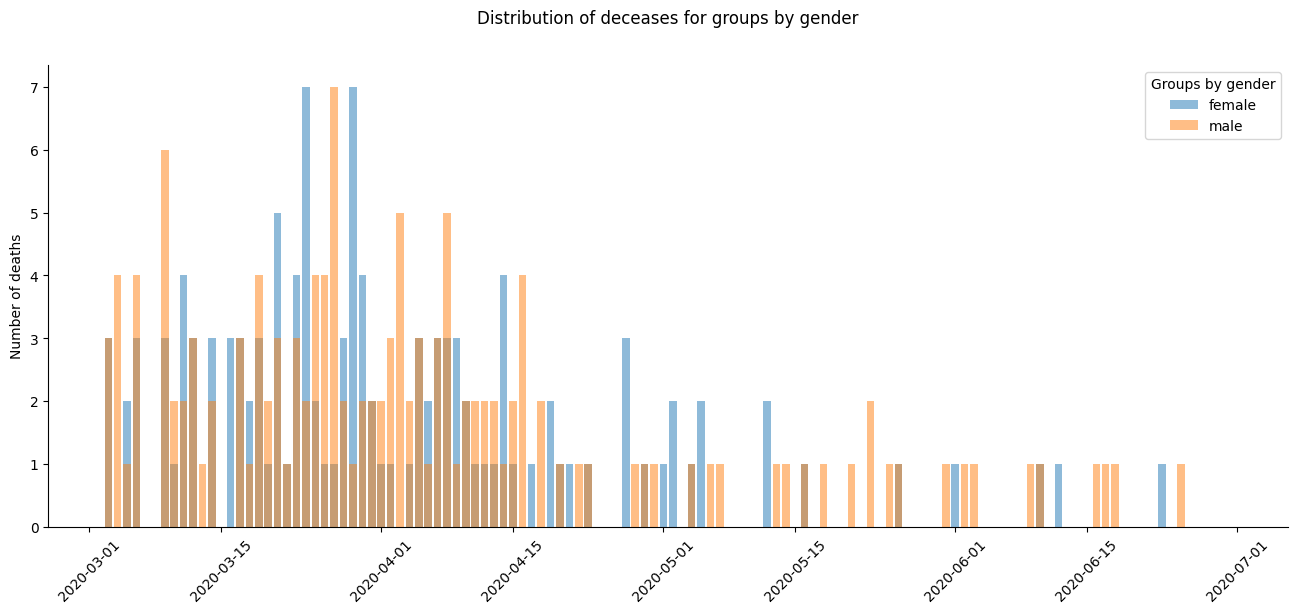

In [70]:
bar_plot_of_changes(
    data_frame=df_filtered_time,
    selected_columns=[
        'deceased_female',
        'deceased_male'],
    start_date=first_record_filtered,
    end_date=last_record_filtered,
    y_label='Number of deaths',
    title='Distribution of deceases for groups by gender',
    legend_title='Groups by gender',
    show_legend=True,
    alpha=0.5
)

### Distribution and effect of virus infection based on person age

The following visualizations use cumulative patient numbers to evaluate the effect of the virus on certain patient groups.

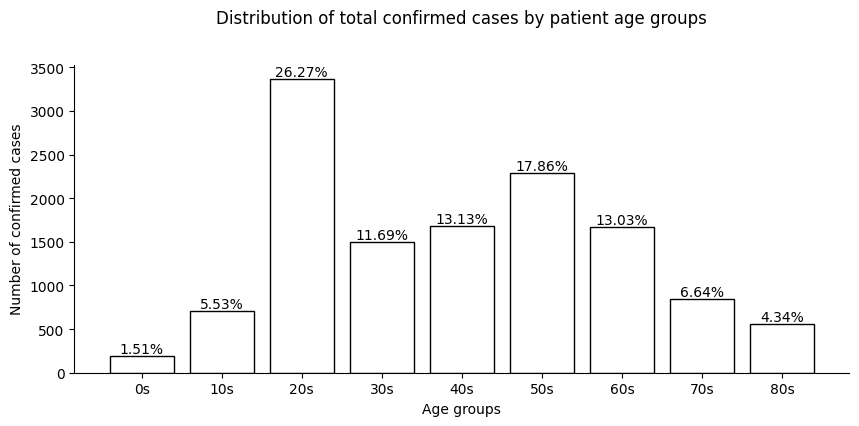

In [71]:
plot_percentage_bars(
    data_frame=df_filtered_time,
    columns=[
        'confirmed_0s',
        'confirmed_10s',
        'confirmed_20s',
        'confirmed_30s',
        'confirmed_40s',
        'confirmed_50s',
        'confirmed_60s',
        'confirmed_70s',
        'confirmed_80s'
    ],
    x_label='Age groups',
    y_label='Number of confirmed cases',
    title='Distribution of total confirmed cases by patient age groups'
)

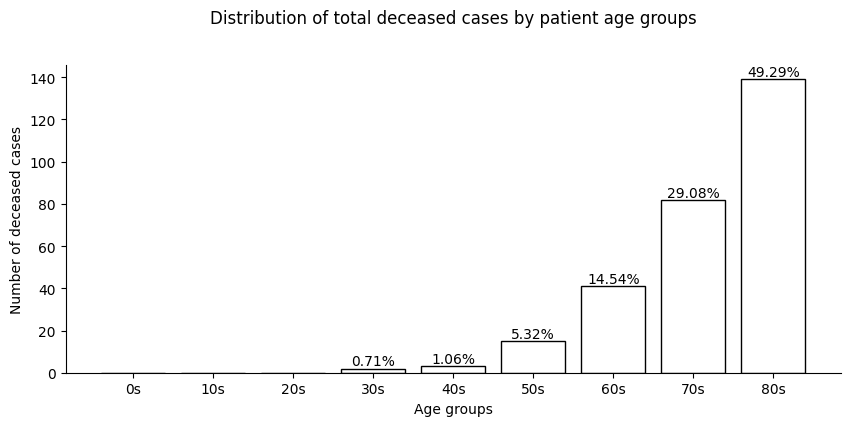

In [72]:
plot_percentage_bars(
    data_frame=df_filtered_time,
    columns=[
        'deceased_0s',
        'deceased_10s',
        'deceased_20s',
        'deceased_30s',
        'deceased_40s',
        'deceased_50s',
        'deceased_60s',
        'deceased_70s',
        'deceased_80s'
    ],
    x_label='Age groups',
    y_label='Number of deceased cases',
    title='Distribution of total deceased cases by patient age groups'
)

When assessing how quickly the virus affects the human body, data which contains detailed information about the cases and patients is used.

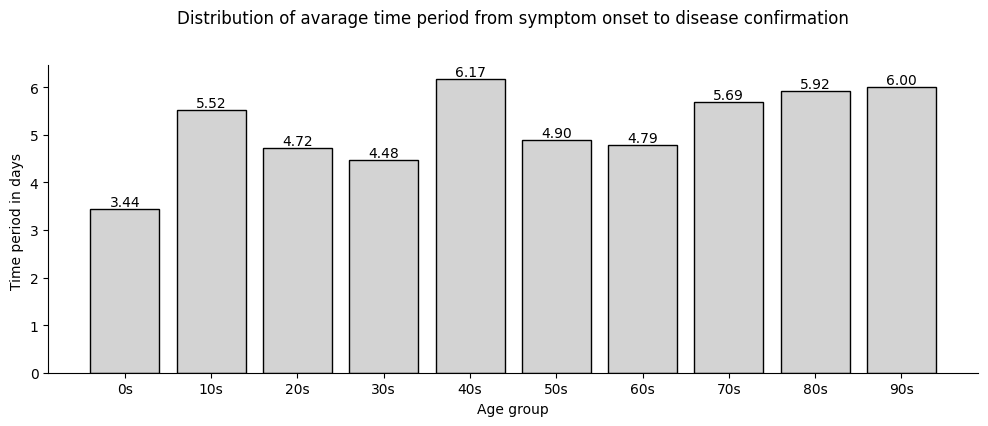

In [73]:
plot_average_bars(
    data_frame=df_patient_info_filtered,
    group_by='age',
    avg_parameter='symptom_to_confirmed',
    x_label='Age group',
    y_label='Time period in days ',
    title='Distribution of avarage time period from symptom onset to disease confirmation'
)

In [74]:
df_patient_info_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3779 entries, 0 to 5160
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sex                    3779 non-null   object        
 1   age                    3779 non-null   object        
 2   symptom_onset_date     551 non-null    datetime64[ns]
 3   confirmed_date         3779 non-null   datetime64[ns]
 4   released_date          1576 non-null   datetime64[ns]
 5   deceased_date          66 non-null     datetime64[ns]
 6   state                  3779 non-null   object        
 7   symptom_to_confirmed   551 non-null    float64       
 8   confirmed_to_released  1576 non-null   float64       
 9   confirmed_to_deceased  66 non-null     float64       
dtypes: datetime64[ns](4), float64(3), object(3)
memory usage: 453.8+ KB


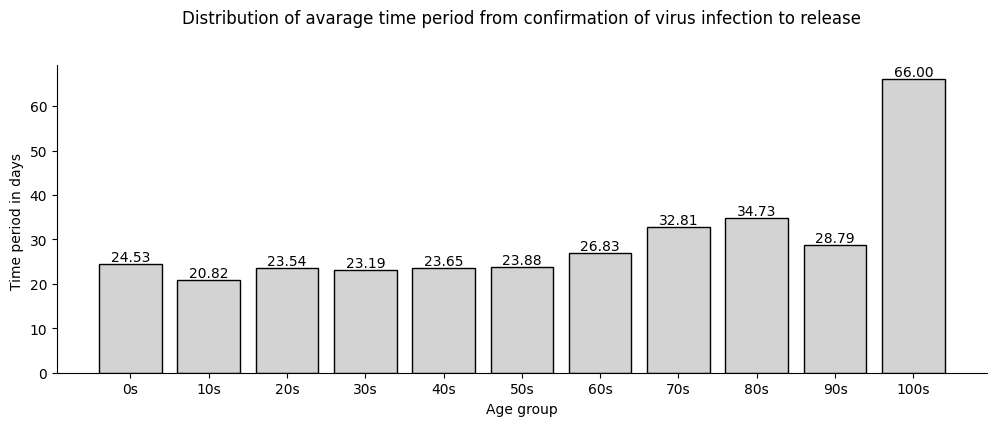

In [75]:
plot_average_bars(
    data_frame=df_patient_info_filtered,
    group_by='age',
    avg_parameter='confirmed_to_released',
    x_label='Age group',
    y_label='Time period in days ',
    title='Distribution of avarage time period from confirmation of virus infection to release'
)

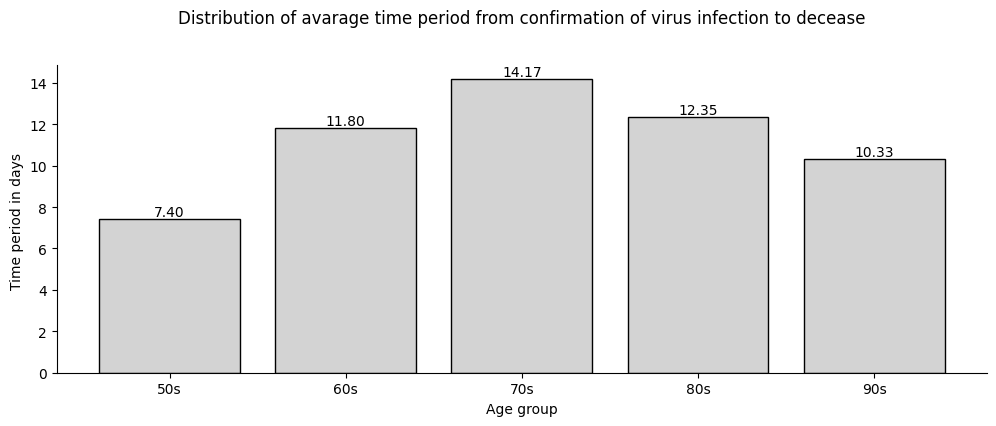

In [76]:
plot_average_bars(
    data_frame=df_patient_info_filtered,
    group_by='age',
    avg_parameter='confirmed_to_deceased',
    x_label='Age group',
    y_label='Time period in days ',
    title='Distribution of avarage time period from confirmation of virus infection to decease'
)

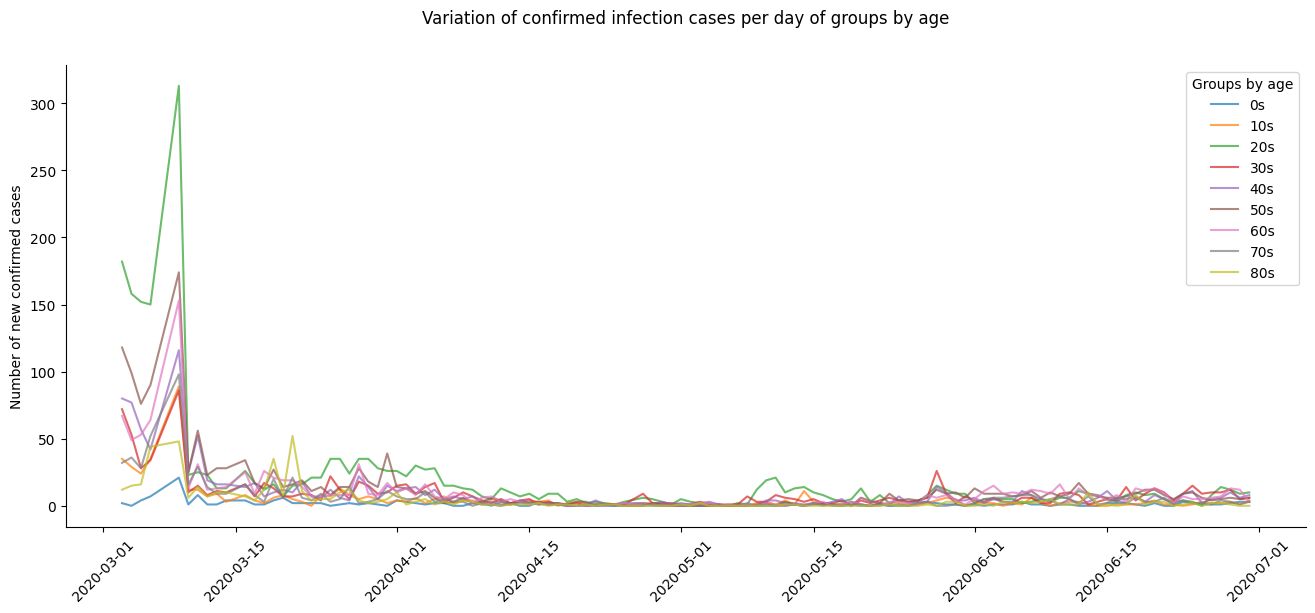

In [77]:
linear_plot_of_changes(
    data_frame=df_filtered_time,
    selected_columns=[
        'confirmed_0s',
        'confirmed_10s',
        'confirmed_20s',
        'confirmed_30s',
        'confirmed_40s',
        'confirmed_50s',
        'confirmed_60s',
        'confirmed_70s',
        'confirmed_80s'
    ],
    start_date=first_record_filtered,
    end_date=last_record_filtered,
    y_label='Number of new confirmed cases',
    title='Variation of confirmed infection cases per day of groups by age',
    legend_title='Groups by age',
    show_legend=True,
    alpha=0.7
)

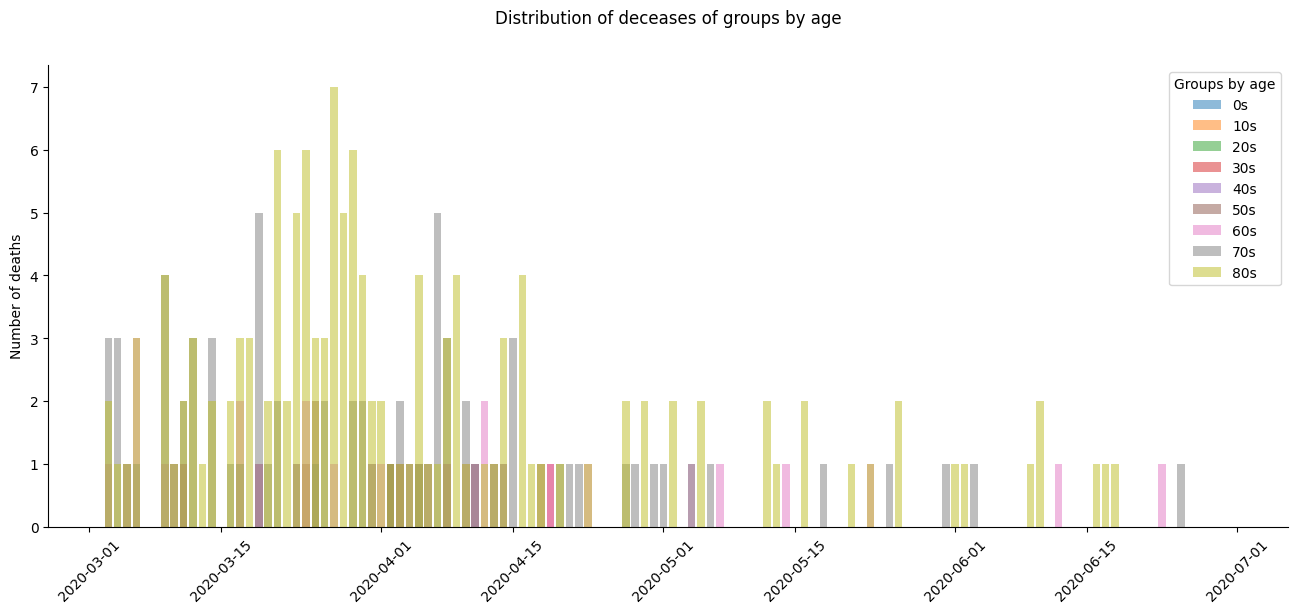

In [78]:
bar_plot_of_changes(
    data_frame=df_filtered_time,
    selected_columns=[
        'deceased_0s',
        'deceased_10s',
        'deceased_20s',
        'deceased_30s',
        'deceased_40s',
        'deceased_50s',
        'deceased_60s',
        'deceased_70s',
        'deceased_80s'],
    start_date=first_record_filtered,
    end_date=last_record_filtered,
    y_label='Number of deaths',
    title='Distribution of deceases of groups by age',
    legend_title='Groups by age',
    show_legend=True,
    alpha=0.5
)

## The impact of seasonality on the virus spread


<p> COVID-19 is a viral respiratory illness caused by the novel coronavirus SARS-CoV-2. The virus primarily spreads through respiratory droplets when an infected person coughs, sneezes, talks, or breathes. Weather conditions, such as average relative humidity, can potentially play a role in the transmission and survival of the virus. </p>
<p>In this section it will be assessed whether there is a relationship between relative humidity and temperature and new cases of infection.</p>
<p>To compute pairwise correlation of features related to recorded weather conditions and the a new confirmed cases, a Pearson (standard correlation coefficient, which is measured of linear correlation between two sets of data) method will be used.</p>

In [79]:
df_weather_for_corr= pd.concat([df_merged_weather[['avg_temp', 'avg_relative_humidity']], df_merged_time['new_cases']], axis=1)
weather_corr = df_weather_for_corr.corr()

In [80]:
weather_corr

,avg_temp,avg_relative_humidity,new_cases
avg_temp,1.000000,0.618801,-0.244007
avg_relative_humidity,0.618801,1.000000,0.009626
new_cases,-0.244007,0.009626,1.000000


In [81]:
find_corr_pairs(weather_corr, 'positive_strong')

Positive Strong correlated pairs (between 0.6 and 1):
Pair: ['avg_relative_humidity', 'avg_temp'], score: 0.6188009853668002


In [82]:
find_corr_pairs(weather_corr, 'negative_moderate')

Negative Moderate correlated pairs (between -0.6 and -0.2):
Pair: ['avg_temp', 'new_cases'], score: -0.24400679416153084


## People behavior on the internet


<p>The search trend data provides insights into the public's interest and awareness of the virus, while the new cases data represents the actual incidence of COVID-19 infections</p>
<p>In this section it will be assessed whether there is a relationship between the search trend on the internet and the number of new COVID-19 cases.</p>
<p>To compute pairwise correlation of features, a Pearson (standard correlation coefficient, which is measured of linear correlation between two sets of data) method is used.</p>

In [83]:
df_searches_for_corr = pd.concat([df_merged_weather[['cold', 'flu', 'pneumonia', 'coronavirus']], df_merged_time['new_cases']], axis=1)

In [84]:
df_searches_for_corr

,cold,flu,pneumonia,coronavirus,new_cases
date,,,,,
2016-01-01,0.11663,0.05590,0.15726,0.00736,NaN
2016-01-02,0.13372,0.17135,0.20826,0.00890,NaN
2016-01-03,0.14917,0.22317,0.19326,0.00845,NaN
2016-01-04,0.17463,0.18626,0.29008,0.01145,NaN
2016-01-05,0.17226,0.15072,0.24562,0.01381,NaN
...,...,...,...,...,...
2020-06-26,0.11381,0.03027,0.11317,2.15139,39.0
2020-06-27,0.10554,0.02136,0.08354,1.96848,51.0
2020-06-28,0.12563,0.02872,0.08072,2.19720,62.0


In [85]:
searches_corr = df_searches_for_corr.corr()
searches_corr

,cold,flu,pneumonia,coronavirus,new_cases
cold,1.000000,0.039712,0.129270,0.310888,0.301383
flu,0.039712,1.000000,0.075376,0.003823,-0.046689
pneumonia,0.129270,0.075376,1.000000,0.481650,-0.063096
coronavirus,0.310888,0.003823,0.481650,1.000000,0.409307
new_cases,0.301383,-0.046689,-0.063096,0.409307,1.000000


In [86]:
find_corr_pairs(searches_corr, 'positive_moderate')

Positive Moderate correlated pairs (between 0.2 and 0.6):
Pair: ['cold', 'new_cases'], score: 0.30138277827213716
Pair: ['cold', 'coronavirus'], score: 0.3108876061044415
Pair: ['coronavirus', 'new_cases'], score: 0.40930725622334513
Pair: ['coronavirus', 'pneumonia'], score: 0.4816495860967241


To assess the possible connection between the change of the frequency of the searched keywords change (in this case increase) and the new cases recorded in the near future, additional columns with time-shifted number of new cases.

In [87]:
for i in range(1,11):
    df_searches_for_corr[f'new_cases_shifted_{i}'] = df_searches_for_corr['new_cases'].shift(-i)

In [91]:
df_searches_for_corr.tail()

,cold,flu,pneumonia,coronavirus,new_cases,new_cases_shifted_1,new_cases_shifted_2,new_cases_shifted_3,new_cases_shifted_4,new_cases_shifted_5,new_cases_shifted_6,new_cases_shifted_7,new_cases_shifted_8,new_cases_shifted_9,new_cases_shifted_10
date,,,,,,,,,,,,,,,
2020-06-26,0.11381,0.03027,0.11317,2.15139,39.0,51.0,62.0,42.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-27,0.10554,0.02136,0.08354,1.96848,51.0,62.0,42.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-28,0.12563,0.02872,0.08072,2.19720,62.0,42.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-29,0.14263,0.04308,0.11254,2.41501,42.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-30,NaN,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
searches_for_corr = df_searches_for_corr.corr()
find_corr_pairs(searches_for_corr, 'positive_strong')

Positive Strong correlated pairs (between 0.6 and 1):
Pair: ['coronavirus', 'new_cases_shifted_7'], score: 0.6036257512604893
Pair: ['coronavirus', 'new_cases_shifted_6'], score: 0.6039107577705468
Pair: ['new_cases_shifted_2', 'new_cases_shifted_8'], score: 0.6321195373947976
Pair: ['new_cases_shifted_3', 'new_cases_shifted_9'], score: 0.6321195373947976
Pair: ['new_cases_shifted_1', 'new_cases_shifted_7'], score: 0.6321195373947976
Pair: ['new_cases', 'new_cases_shifted_6'], score: 0.6321195373947976
Pair: ['new_cases_shifted_10', 'new_cases_shifted_4'], score: 0.6321195373947976
Pair: ['new_cases_shifted_2', 'new_cases_shifted_7'], score: 0.7064637379740882
Pair: ['new_cases', 'new_cases_shifted_5'], score: 0.7064637379740882
Pair: ['new_cases_shifted_1', 'new_cases_shifted_6'], score: 0.7064637379740882
Pair: ['new_cases_shifted_10', 'new_cases_shifted_5'], score: 0.7064637379740882
Pair: ['new_cases_shifted_3', 'new_cases_shifted_8'], score: 0.7064637379740882
Pair: ['new_cases_sh

# Findings Overview

Summarizing of the knowledge and insights gained during the analysis of collected data from South Korea is as follows:
* A total of more than __1.2 mln.__ of tests were performed, of which __3,39%__ were positive for Covid-19 virus;
* On average, regardless of gender or age, a positive test result was recorded about 5-6 days after the recorded symptom;
* In the period of data collection, __57,07%__ of all positive cases identified were males and __42,93%__ were female (total number of confirmed cases - 18.000);
* After analyzing the variantion of confirmed new infections cases per day for groups by gender and age, it can be noticed that in the beginning there were more infected patients which are classified according to gender to females and according to age as 20s. However, no exceptional changes were noticed in the rest of the period;
* After analyzing the distribution confirmed new cases for groups by age, it can be seen that the most infected are __20s__ (__26,27%__ from total number), 50s (17,85%), 40s (13,13%) 60s (13,03%);
* On average, regardless the gender, a patient was considered recovered after about __25 days__ from a recorded positive test result date;
* After analyzing average recovery period for group by age, it can be seen that younger people recover faster (takes an average of 24 days) than older people (age groups over 70 years old takes 32 days and more);
* In case of death, death was recorded on average __11 days__ after the confirmed positive test date;
* A total of __282__ deaths from complications caused by Covid-19 virus were recorded, of which __53,55%__ are male and __46,45%__ are female;
* After analyzing the distribution of deaceases for groups by gender, it is noticed that males in case of death, in average dies after about __10 days__ from a positive test result, females - after __17 days__;
* After analyzing the distribution of deaceases for groups by age, it is noticed that in case of death, the most deceased patients are from the __80s__ age group (__42,29%__ of the total), next in order is 70s (29,08%), 60s (14,54%), 50s (5,32%);
* The overall mortality rate is __2,2%__ of all positive cases;
* During the analyses, a negative moderate correlation between the calculated average outdoor temperature and the new case recorded was found (standard correlation coefficient is equal to __-0,24__);
* Positive moderate relationships was found for the following pairs 'coronavirus' and 'pneumonia (0,48), 'coronacirus' and new cases (__0,41__), 'cold' and 'coronavirus' (0,31), 'cold' and new cases (__0,30__);
* During the analysis, a strong positive relationship between the date of the new case which being pushed back by 6 days and the search result 'coronavirus' was found (standard correlation coefficient is equal to __0,61__).

# Conclution

Based on the acquired knowledge about the virus, its effects on people and the behavior of the people themselves during the pandemic, in order to manage a possible new crisis in the country that has not yet encountered the virus, it would be necessary to follow the following recommendations:
1. __The most vulnerable people must be protected__ - from the collected data it can be seen, that people over 50 are in the highest risk group. For this group of people, recovery takes longer and due to possible other concomitant diseases and complications caused by the virus the probability of decease is higher. It should also be noted that in terms of gender, men are in a higher risk group than women in this case. For this reason, special attention must be paid to the availability of these persons by means of the applied measures;
2. __The behavior of certain age groups must be adjusted__ - it is necessary to evaluate the most frequent ways of spreading the virus. It must be noted that the most infected patients were found to be in the age group of 20s and 50s, so in order to reduce the spread of the virus it is necessary to evaluate the lifestyle and daily activities of these people and adjust them accordingly;
3. __Plan the hospital and laboratory work ahead in various scenarios__ - from the example of South Korea, it can be seen that it is necessary to be able to carry out large amounts of tests and to be able to provide assistance to newly confirmed patients, since the average time from the detection of the virus to possible death is about 11 days;
4. __The public must be constantly informed about the virus, its course and specifics__ - from the trending keywords search results, it can be seen that the search for information on the Internet increased during the pandemic period. It should be mentioned that during the analysis was found a strong positive relationship between the new cases (dated 6 days after the increase in searches) and information related to the virus on the Internet, which means that people may have experienced symptoms (or had a contact with infected patient) and are willing to get tested. The number of these days also coincides with the average period between the records of the first symptom and a positive test results which was found during the analysis. Must not be forgotten that constant education of people can raise their level of awareness and help prevent the spread of this type of virus.

# Discussion

Additional considerations could be possible: 

1.  During the analysis __a negative moderate relationship between average temperature and new cases__ was recorded. Since the data sets provides information from a relatively short period of time (__spring, 2020__) and the temperature fluctuations were not as noticeable as when seasons are  changing. To assess whether infectivity differs from seasonality in people outside or whether it has more of an impact on people's behavior and their presence indoors further research could be continued;
2. One of the __additional recommendation__ could be __to increase the testing__, even for people without symptoms, it might help be to identify cases faster:
<p>This assumption can be made based on the search result correlation for new cases:</p> 
* It is known that __common cold__, __flue/influenza__ and __corona virus__ to share similar symptoms;
* It is also known that __Colds usually lasts about 3 to 7 days__ in adults and 10 days in children. The incubation period for most common cold viruses is __24-72 hours__;
* __Flue/Influenza__ has typical __incubation period 1 to 4 days__ (average two days). The time between onset of illness among household contacts (known as the serial interval) is three to four days;
* It can be difficult to distinguish between influenza and COVID-19 based on clinical manifestations alone. 
<p></p><p> As mentioned earlier, a strong correlation is visible between the search result and a new case after 6 days was found. Such time may be due to the fact that at first it was thought that the symptoms are more similar to the common cold or flu, but knowing that the symptoms should either pass or appear stronger in a period of 2-7 days, it is suspected that it may be the covid 19 virus and only then the test was performed. Therefore, the test at an earlier stage can have an impact on human behavior and reduce the possible risk of spreading the virus in case of positive test results. </p>